In [1]:
# grv08singh@gmail.com

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [3]:
df = pd.read_csv('MaunaLoaDailyTemps.csv')

In [4]:
df.head(2)

,DATE,MinTemp,MaxTemp,AvgTemp,Sunrise,Sunset
0,1/1/2014,33.0,46.0,40.0,657,1756
1,1/2/2014,35.0,50.0,43.0,657,1756


In [6]:
df[df['AvgTemp'] > 50].shape[0]

331

In [7]:
df['DATE'] = pd.to_datetime(df['DATE'])

In [8]:
df.head(2)

,DATE,MinTemp,MaxTemp,AvgTemp,Sunrise,Sunset
0,2014-01-01,33.0,46.0,40.0,657,1756
1,2014-01-02,35.0,50.0,43.0,657,1756


In [9]:
df['year'] = df['DATE'].dt.year

In [10]:
df.head(2)

,DATE,MinTemp,MaxTemp,AvgTemp,Sunrise,Sunset,year
0,2014-01-01,33.0,46.0,40.0,657,1756,2014
1,2014-01-02,35.0,50.0,43.0,657,1756,2014


In [11]:
df.groupby('year')['AvgTemp'].mean()

year
2014    46.296703
2015    47.145205
2016    47.687671
2017    46.642857
2018    46.316804
Name: AvgTemp, dtype: float64

In [12]:
df.groupby('year')['MinTemp'].mean()

year
2014    38.096154
2015    38.961644
2016    39.326027
2017    38.225275
2018    38.573003
Name: MinTemp, dtype: float64

In [13]:
df.groupby('year')['MaxTemp'].mean()

year
2014    53.964286
2015    54.843836
2016    55.605479
2017    54.571429
2018    53.584022
Name: MaxTemp, dtype: float64

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1825 entries, 0 to 1824
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   DATE     1825 non-null   datetime64[ns]
 1   MinTemp  1821 non-null   float64       
 2   MaxTemp  1821 non-null   float64       
 3   AvgTemp  1821 non-null   float64       
 4   Sunrise  1825 non-null   int64         
 5   Sunset   1825 non-null   int64         
 6   year     1825 non-null   int32         
dtypes: datetime64[ns](1), float64(3), int32(1), int64(2)
memory usage: 92.8 KB


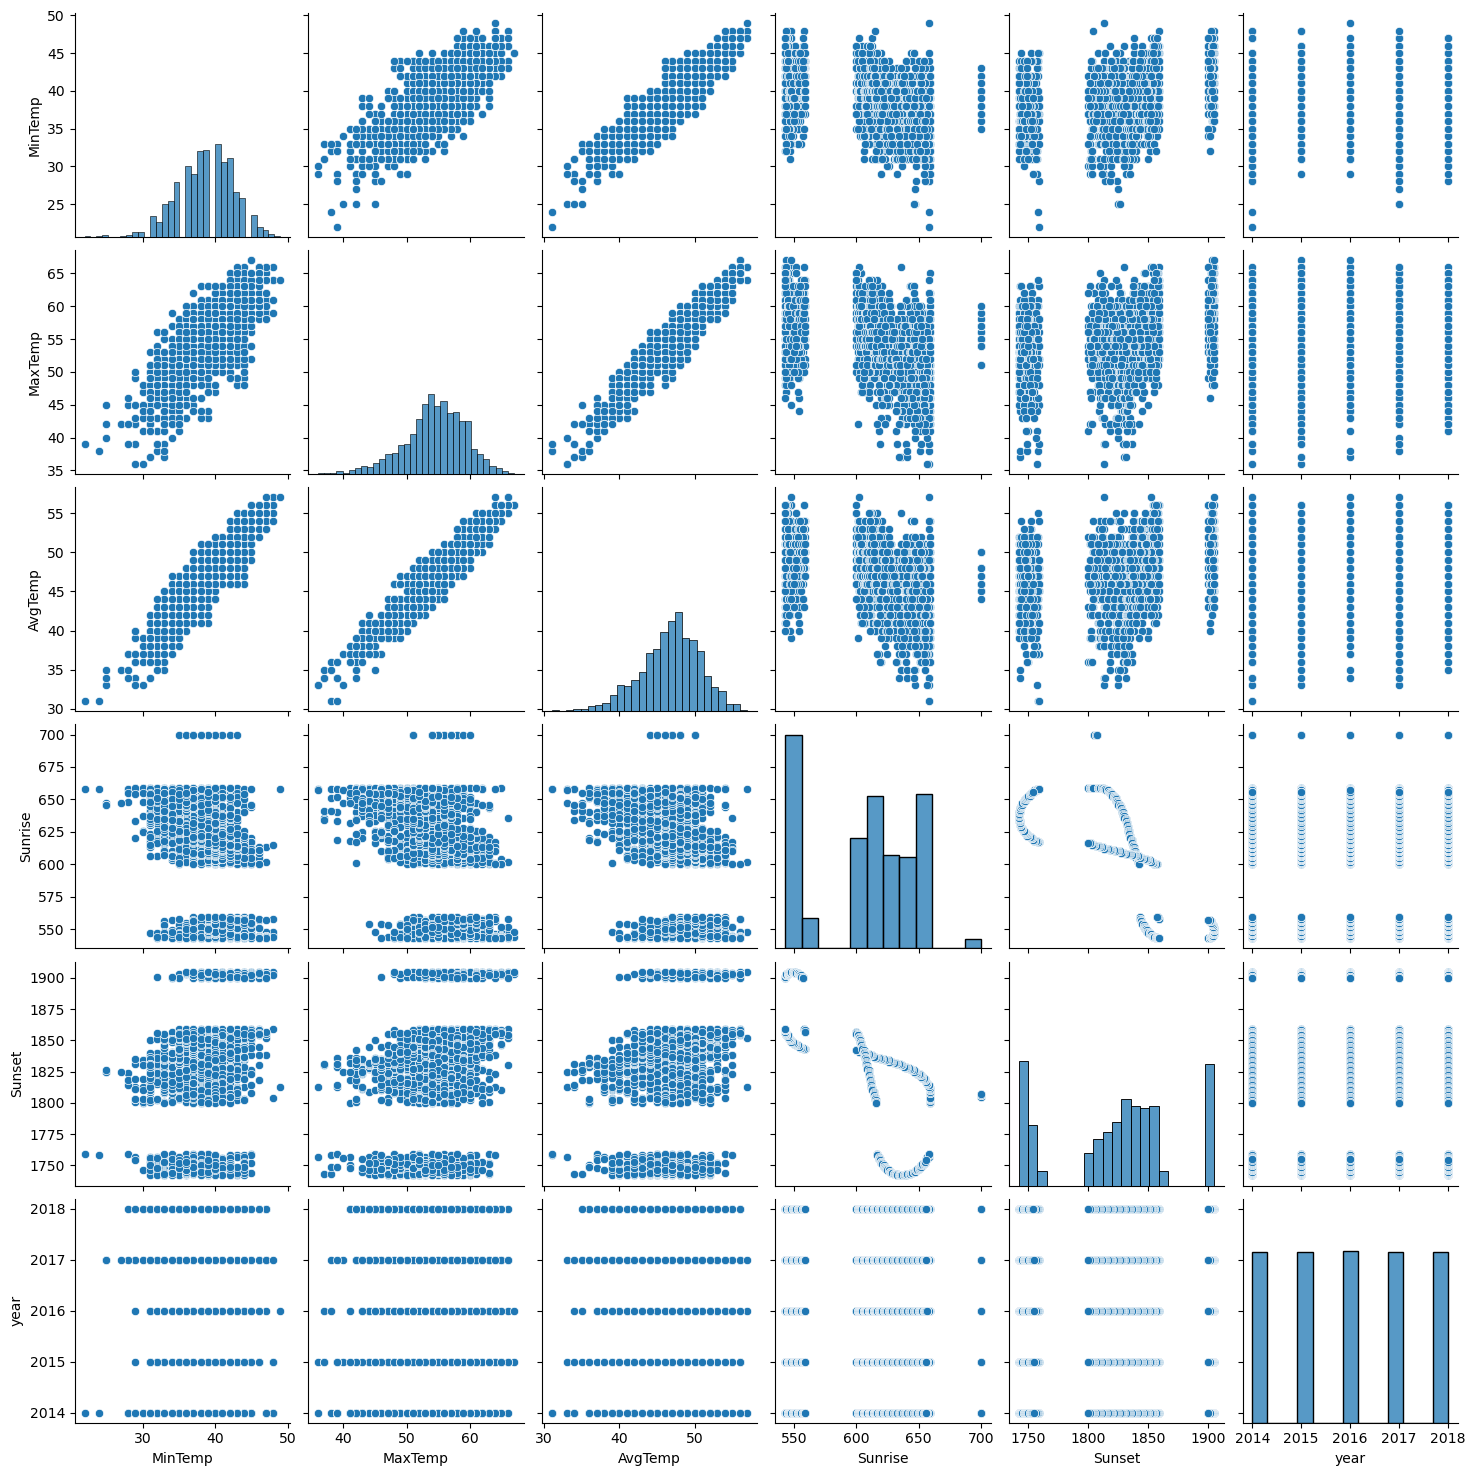

In [15]:
sns.pairplot(df)

In [16]:
from statsmodels.tsa.stattools import adfuller
def stationary(df):
    #adfuller test
    #H0: Non Stationary
    #H1: Stationary
    p_val = adfuller(df)[1]
    if p_val <= 0.05:
        return True
    else:
        return False

In [17]:
df.head(2)

,DATE,MinTemp,MaxTemp,AvgTemp,Sunrise,Sunset,year
0,2014-01-01,33.0,46.0,40.0,657,1756,2014
1,2014-01-02,35.0,50.0,43.0,657,1756,2014


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1825 entries, 0 to 1824
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   DATE     1825 non-null   datetime64[ns]
 1   MinTemp  1821 non-null   float64       
 2   MaxTemp  1821 non-null   float64       
 3   AvgTemp  1821 non-null   float64       
 4   Sunrise  1825 non-null   int64         
 5   Sunset   1825 non-null   int64         
 6   year     1825 non-null   int32         
dtypes: datetime64[ns](1), float64(3), int32(1), int64(2)
memory usage: 92.8 KB


In [19]:
df_copy = df.copy()

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1825 entries, 0 to 1824
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   DATE     1825 non-null   datetime64[ns]
 1   MinTemp  1821 non-null   float64       
 2   MaxTemp  1821 non-null   float64       
 3   AvgTemp  1821 non-null   float64       
 4   Sunrise  1825 non-null   int64         
 5   Sunset   1825 non-null   int64         
 6   year     1825 non-null   int32         
dtypes: datetime64[ns](1), float64(3), int32(1), int64(2)
memory usage: 92.8 KB


In [21]:
df = df.drop(columns=['MinTemp','MaxTemp','Sunrise','Sunset','year'])

In [22]:
df.head(2)

,DATE,AvgTemp
0,2014-01-01,40.0
1,2014-01-02,43.0


In [24]:
df = df.set_index('DATE')

In [26]:
df.head(2)

,AvgTemp
DATE,
2014-01-01,40.0
2014-01-02,43.0


In [30]:
df['AvgTemp'] = df['AvgTemp'].fillna(df['AvgTemp'].mean())

In [31]:
df.isnull().sum()

AvgTemp    0
dtype: int64

In [32]:
stationary(df)

True

## Data is Stationary, Hence, No BoxCox or Differencing is required

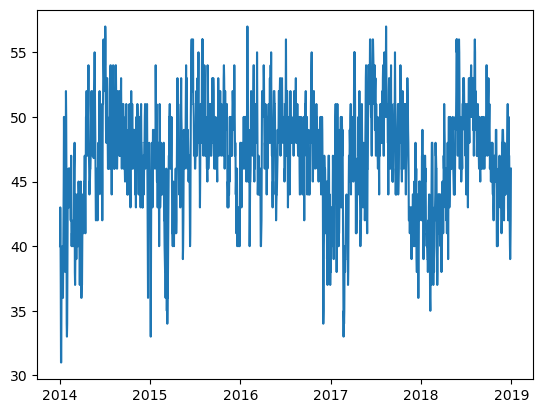

In [34]:
plt.plot(df.index, df['AvgTemp'])

In [35]:
df.shape[0]

1825

In [36]:
df = pd.read_csv('stocks.csv')

In [37]:
df.head(2)

,Date,Open,High,Low,Close
0,9/14/2018,2044.0,2071.550049,2018.150024,2065.399902
1,9/17/2018,2070.0,2077.800049,2054.550049,2074.149902


In [38]:
df[(df['High'] - df['Low']) > 150].shape[0]

8

In [39]:
from statsmodels.graphics.tsaplots import plot_pacf

In [46]:
df_diff = df['Open'].diff()

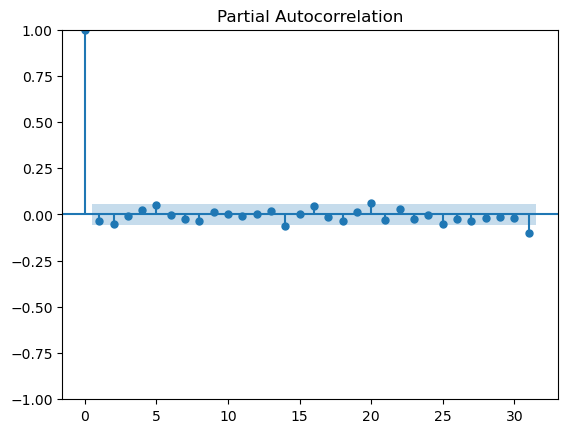

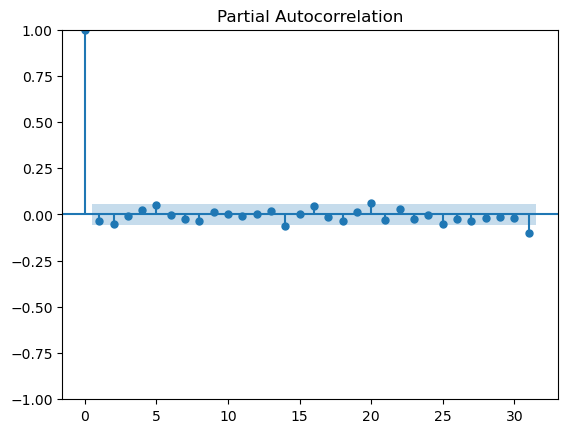

In [47]:
plot_pacf(df_diff[1:])